# SymPy: Calculus

In [1]:
from dsutil import np, sym, plt

## 1. SymPy
[SymPy] is a exclusive and native library to Python, designed for [symbolic computation]. This mean mathematical expressions will be left in their symbolic forms and represented exactly, not approximately. SymPy can do this for all kinds of computations such as simplication, limits, derivatives and solving equations.

[SymPy]: https://github.com/sympy/sympy
[symbolic computation]: https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html#what-is-symbolic-computation

### 1.1. Expression
Expression is the most basic concept in Mathematics. We are going to use SymPy to create symbolic variables (distiguish them with Python variables), write expressions and substitute numbers to make ealuation.

In [3]:
# create some variables
x, y, z = sym.symbols('x,y,z')

In [38]:
# write an expression
expr = x**2 + 3*y + sym.cos(z)
expr

x**2 + cos(z) + 3*(x**2 - 4)/(x - 2)

In [42]:
# substitute numbers, partially or fully
expr.subs({x: 2, y: 1})

cos(z) + 7

In [45]:
# by default, sympy will only evaluate non-decimal numbers once calling evalf()
sym.pi.evalf()

3.14159265358979

### 1.2. Simplification
[Simplification] is one of the most interesting parts in Mathematics. SymPy provides
<code style="font-size:13px">simplify()</code>
, a general but slow simplifier and a number of faster simplifiers dedicated to specific cases.

[Simplification]: https://docs.sympy.org/latest/tutorials/intro-tutorial/simplification.html#

In [1]:
from dsutil import sym

In [2]:
x, y, z = sym.symbols('x:z')

In [3]:
lhs = sym.gamma(x) / sym.gamma(x-2)
rhs = lhs.simplify()
sym.Eq(lhs, rhs)

Eq(gamma(x)/gamma(x - 2), (x - 2)*(x - 1))

#### Polynomials
In polynomials, expansion and factorization are two opposite tasks, one prefers sum form of monomials and the other prefer product form of irreducible factors. Sometimes, we also want to collect monomials with the same degree.

In [4]:
lhs = (x+1) * (x+2) * (x+3)
rhs = lhs.expand()
sym.Eq(lhs, rhs)

Eq((x + 1)*(x + 2)*(x + 3), x**3 + 6*x**2 + 11*x + 6)

In [5]:
lhs = x**10 + x**2 + 1
rhs = lhs.factor()
sym.Eq(lhs, rhs)

Eq(x**10 + x**2 + 1, (x**2 - x + 1)*(x**2 + x + 1)*(x**6 - x**4 + 1))

In [6]:
lhs = x**2*z + 4*x*y*z + 4*y**2*z
rhs = lhs.factor()
sym.Eq(lhs, rhs)

Eq(x**2*z + 4*x*y*z + 4*y**2*z, z*(x + 2*y)**2)

In [7]:
lhs = x*y + x + 3 + 2*x**2 + z*x**2
rhs = lhs.collect(x)
sym.Eq(lhs, rhs)

Eq(x**2*z + 2*x**2 + x*y + x + 3, x**2*(z + 2) + x*(y + 1) + 3)

#### Trigonimetric functions

In [8]:
expr = sym.sin(x)**2 + sym.cos(x)**2
result = expr.trigsimp()
sym.Eq(expr, result)

Eq(sin(x)**2 + cos(x)**2, 1)

In [10]:
expr = sym.sin(2*x)
result = sym.expand_trig(expr)
sym.Eq(expr, result)

Eq(sin(2*x), 2*sin(x)*cos(x))

#### Rewrite
A common way to deal with special functions is to *rewrite* them in terms of one another.

In [ ]:
expr = sym.tan(x)
result = expr.rewrite(sym.cos)
sym.Eq(expr, result)

Eq(tan(x), cos(x - pi/2)/cos(x))

In [25]:
lhs = sym.gamma(x)
rhs = lhs.rewrite(sym.factorial)
sym.Eq(lhs, rhs)

Eq(gamma(x), factorial(x - 1))

### 1.3. Solvers
A quick review of number sets in Mathematics: $\mathbb{N}$ (naturals), $\mathbb{Z}$ (integers), $\mathbb{Q}$ (rationals), $\mathbb{R}$ (reals) and $\mathbb{C}$ (complexes). They serve an important role of defining scope of the input.

In [21]:
from dsutil import sym

In [3]:
x, y, z = sym.symbols('x:z')

#### Equation solver
The function
<code style="font-size:13px">[solveset()]</code>
solves an equation for one variable and returns a set of solutions. When an expression is passed in, it is automatically assumed to equal $0$. We can also change the equation domain to get appropriate solutions.

[solveset()]: https://docs.sympy.org/latest/modules/solvers/solveset.html

In [4]:
eq = sym.Eq(x**2, 1)
sym.solveset(eq, x)

{-1, 1}

In [5]:
sym.solveset('x^2 + 2*x + 5', x)

{-1 - 2*I, -1 + 2*I}

In [6]:
sym.solveset('x^2 + 2*x + 5', x, domain=sym.S.Reals)

EmptySet

#### Linear system solver
We can solve systems of equations by specifying each equation explicitly or using agumented matrix.

In [88]:
eq_sys = [
    sym.Eq(x + y + z, 6),
    sym.Eq(x + 2*y + z, 8),
    sym.Eq(x + y + 2*z, 9)
]

sym.linsolve(eq_sys, [x, y, z])

{(1, 2, 3)}

In [58]:
mat_agumented = sym.Matrix([
    [1, 1, 1, 6],
    [1, 2, 1, 8],
    [1, 1, 2, 9]
])

sym.linsolve(mat_agumented, (x, y, z))

#### Inequality solver
SymPy [solves inequalities] via a number of functions adapt to various cases.

[solves inequalities]: https://docs.sympy.org/latest/modules/solvers/inequalities.html

In [33]:
ineq = x**2 >= 4
sym.solve_univariate_inequality(ineq, x)

((2 <= x) & (x < oo)) | ((x <= -2) & (-oo < x))

## 2. Limits

### 2.1. Preview

In [1]:
from dsutil import np, plt

#### The velocity problem
[Rate of change] or instantaneous [velocity] is an important concept in Data Science and Machine Learning. It is expressed as the [slope] $m$ of a line $y=mx+c$. However, in a non-linear function (which is very popular), the velocity changes as $x$ changes. To measure the instantaneous velocity at any given point, an visual approach is trying to draw a [tangent] then find its slope by computing $\Delta{y}/\Delta{x}$.

<img src="../image/chap-02/velocity-problem.png" style="height:300px; margin:20px auto 20px;">

Let's an this example, we want to draw the tangent of the parabola at the blue point, $a$. It is the blue line, but we will have a hard time finding it. It would be more reasonable for us to approximate the tangent by drawing a [secant], like the red one.

$$m_a\approx\frac{f(x)-f(a)}{x-a}$$

We also observe that the orange secant is less accurate, as the orange $x$ is further from the $a$, compared to red $x$. In other words, we would want to move $x$ as close to $a$ as possible, but never let them overlap to make sure the secant can always be drawn. We say that $x$ approaches $a$, denoted $x\rightarrow a$. Such a process is mathematically written as:

$$m_a=\lim_{x\rightarrow a}\frac{f(x)-f(a)}{x-a}$$

[Rate of change]: https://en.wikipedia.org/wiki/Time_derivative
[velocity]: https://en.wikipedia.org/wiki/Velocity
[slope]: https://en.wikipedia.org/wiki/Slope
[tangent]: https://en.wikipedia.org/wiki/Tangent
[secant]: https://en.wikipedia.org/wiki/Secant_line

#### The area problem
Another popular problem in Calculus is evaluating the area under a curve over an interval. Same as the velocity problem, we cannot compute it exactly, but can try to approximate it.

<img src="../image/chap-02/area-problem.png" style="height:300px; margin:20px auto 20px;">

One way to do this is dividing up the interval $[a,b]$ into $N$ small bins, each has a width of $h$ and is represented by a point $x_n$. This point is usually placed at the center or at one of the two boundaries of a bin. For each bin $n$, draw a rectangular having width of $h$ and height of $f(x_n)$. The area can be approximated by summing up the areas of all rectangulars:

$$S\approx\sum_{n=1}^{N}{hf(x_n)}$$

It's obvious that, the smaller $h$ is, the more accurate of our approximation. So we would want to reduce $h$ to be as close to $0$ as possible, but never equal to $0$ because at this point we cannot *draw* rectangulars. This is formally written as:

$$S=\lim_{h\rightarrow0}\sum_{n=1}^{N}{hf(x_n)}$$

### 2.2. Limits
[Limit] (of a function) is an essential building block in Calculus. This section will takes a deeper look at function limits to explain what limits are, but avoid the Mathematical definition. We also discuss of how to estimate them using SymPy instead of Mathematical approaches.

[Limit]: https://en.wikipedia.org/wiki/Limit_of_a_function

#### Cases of limit
<img src="../image/chap-02/limit-types.png" style="height:300px; margin:20px auto 20px;">

The images above show the behaviours of different functions around $x=2$. It summrizes most popular cases you may face when finding a limit:
- *Constant limits*. This is the easiest one to understand, shown in the first image. Even the function is not defined at $x=2$, it still has a limit:

$$\lim_{x\rightarrow2}\frac{x^2-4}{x-2}=4$$

- *One-sided limits*. In the second image, $y$ approaches different values when $x$ comes in different directions. The previous function in fact is a special case of one-sided limits, where limits of a function from both sides are equal. In this case:

$$\lim_{x\rightarrow2^-}\frac{|x-2|}{x-2}=-1;\qquad\lim_{x\rightarrow2^+}\frac{|x-2|}{x-2}=1$$

- *Infinite limits*. Limits are not constrained to be a number. If $f(x)$ increases or decrease without bound as $x\rightarrow a$, then the limit is said to be positive/negative infinite.

$$\lim_{x\rightarrow2}\frac{1}{(x-2)^2}=+\infty$$

- *Non-existant limits*. Sometimes, limits don't exist. For example, consider the function $y=\sin(x)$. When $x\rightarrow+\infty$, $y$ oscillates between $-1$ and $1$ and never converges. Limit in this case does not exist.

#### Limits evaluation
Limits can be evaluated by looking at graphs or by constructing tables of function values. For more complex function, we cannot rely on these methods. Using a number of basic laws, here are some techniques we can use to evaluate limits: direct substitution, factorization, rationalization, conjugate multiplication, [L'Hospital's rule] and [squeeze theorem].

However, this topic is not a Calculus textbook, so instead of diving into these techniques, we are going to use SymPy. It provides us the function <code style="font-size:13px">limit()</code>
evaluates the limit and the
<code style="font-size:13px">Limit</code>
class to store the unevaluated expression. Both take following arguments, in that order:
- The function you want to evaluate limit
- The variable in the limit
- The value which the variable tends towards
- The direction of the limit

[L'Hospital's rule]: https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule
[squeeze theorem]: https://en.wikipedia.org/wiki/Squeeze_theorem

In [34]:
from dsutil import sym

In [35]:
x = sym.Symbol('x')
y = (x**2 - 4) / (x -2)

lim = sym.Limit(y, x, 2, dir='+-')
sym.Eq(lim, lim.doit())

Eq(Limit((x**2 - 4)/(x - 2), x, 2, dir='+-'), 4)

In [44]:
x = sym.Symbol('x')
y = 1 / (x -2)**2

lim = sym.Limit(y, x, 2, dir='+-')
sym.Eq(lim, lim.doit())

Eq(Limit((x - 2)**(-2), x, 2, dir='+-'), oo)

In [17]:
x = sym.Symbol('x')
y = sym.sin(1/x)

y.limit(x, 0, '+')

AccumBounds(-1, 1)

#### Euler's number
Imagine you are lending $1$ dollar at the [compound interest] rate of $100\%$ a year. How much money will you have after a year, if the compounding frequency $n$ keeps increasing? This problem leads directly to the definition of the [Euler's number], $e$:

$$e=\lim_{n\rightarrow\infty}\left(1+\frac{1}{n}\right)^n$$

Euler's number is one of the most important concepts in Mathematics and Calculus.

[Euler's number]: <https://en.wikipedia.org/wiki/E_(mathematical_constant)>
[compound interest]: https://en.wikipedia.org/wiki/Compound_interest

## 3. Derivatives
The [derivative] of a function $f$ is a function $f'$ describes velocities at different points. The process of finding a derivative is called [differentiation]. In Data Science, the most recognizable application of Differential Calculus is solving optimization problems.

[derivative]: https://en.wikipedia.org/wiki/Derivative
[differentiation]: https://en.wikipedia.org/wiki/Differential_calculus

### 3.1. Definition
Let's $y=f(x)$ be a function. The *derivative function*, denoted $f'(x)$, is a set of points that the following limit exists:

$$f'(x)=\frac{dy}{dx}=\lim_{\Delta{x}\rightarrow0}\frac{f(x+\Delta{x})-f(x)}{\Delta{x}} $$

Using this definition, we can find the derivatives of basic functions, for example:

$$\begin{aligned}
\frac{d}{dx}x^2
&= \lim_{h\rightarrow0}\frac{(x+h)^2-x^2}{h} \\
&= \lim_{h\rightarrow0}\frac{2hx+h^2}{h} \\
&= \lim_{h\rightarrow0}(2x+h) \\
&= 2x \\
\end{aligned}$$

#### Leibniz's notation
The expression $dy/dx$, [Leibniz's notation](https://en.wikipedia.org/wiki/Leibniz's_notation), is a more versatile way to write derivatives and is highly recommended. Here is how we write higher order derivatives:

$$
f''(x)=\frac{d^2}{dx^2}f(x);\qquad f'''(x)=f^{(3)}=\frac{d^3}{dx^3}f(x)
$$

### 3.2. Differentiability
Sometimes, derivatives at some points of a function $f$ cannot be evaluated, such a function is said to be non-[differentiable]. This happens when there is at least one point $x=a$ the derivative does not exist. Here are some common cases:
- $f$ is not [continuous] at $a$ over its [domain].
- $f$ is continuous but is not [smooth] at $a$. Formally, the limits differ when $x$ aproaches $a$ from two sides. Example: $f(x)=|x|$ at $x=0$.
- $f$ has an infinite limit at $a$. In other words, the tangent at $a$ is a vertical line. Example: $f(x)=\sqrt[3]{x}$ at $x=0$.
- The limit at $a$ of $f$ does not exist. For example: $f(x)=\sin(1/x)$ at $x=0$.

[differentiable]: https://en.wikipedia.org/wiki/Differentiable_function
[continuous]: https://en.wikipedia.org/wiki/Continuous_function
[domain]: https://en.wikipedia.org/wiki/Domain_of_a_function
[smooth]: https://en.wikipedia.org/wiki/Smoothness

In [7]:
from dsutil import np, plt, sym

In [2]:
x, y, z = sym.symbols('x,y,z')

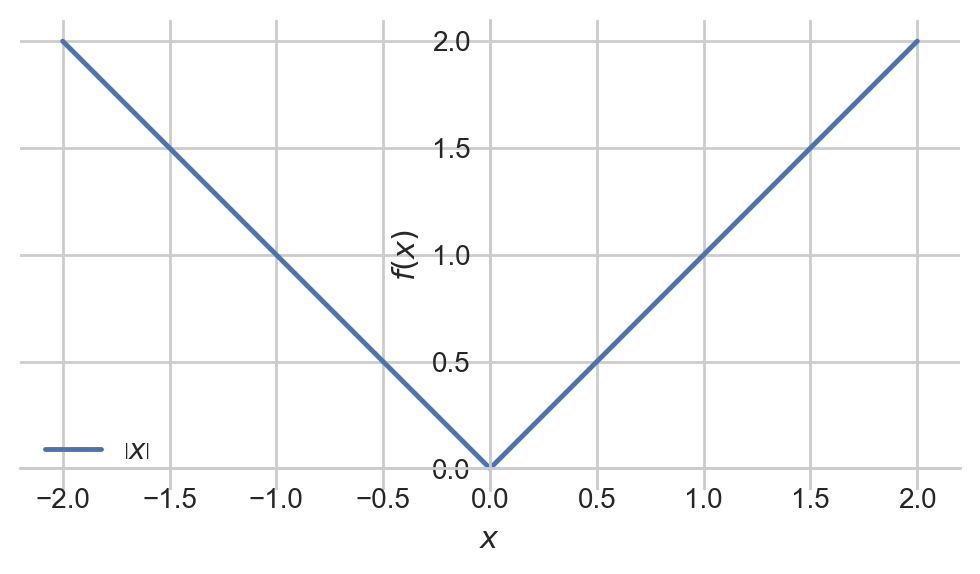

In [8]:
_ = sym.plot(
    (sym.Abs(x), (x, -2, 2)),
    show=True, aspect_ratio=(1,1), legend=True, size=(5,5)
)

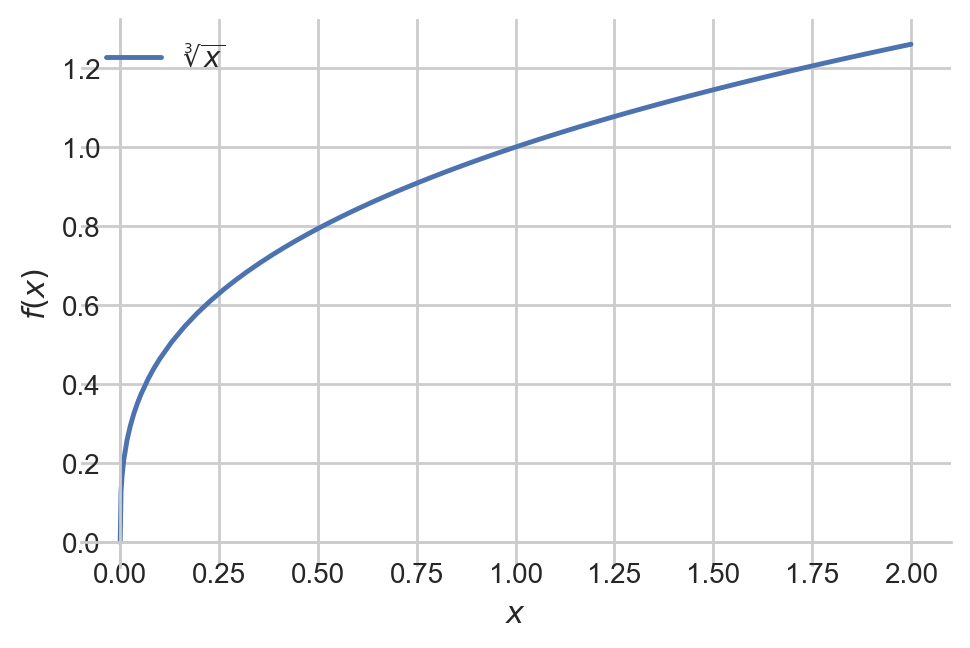

In [8]:
_ = sym.plot(
    (sym.cbrt(x), (x, 0, 2)),
    show=True, aspect_ratio=(1,1), legend=True, size=(5,5)
)

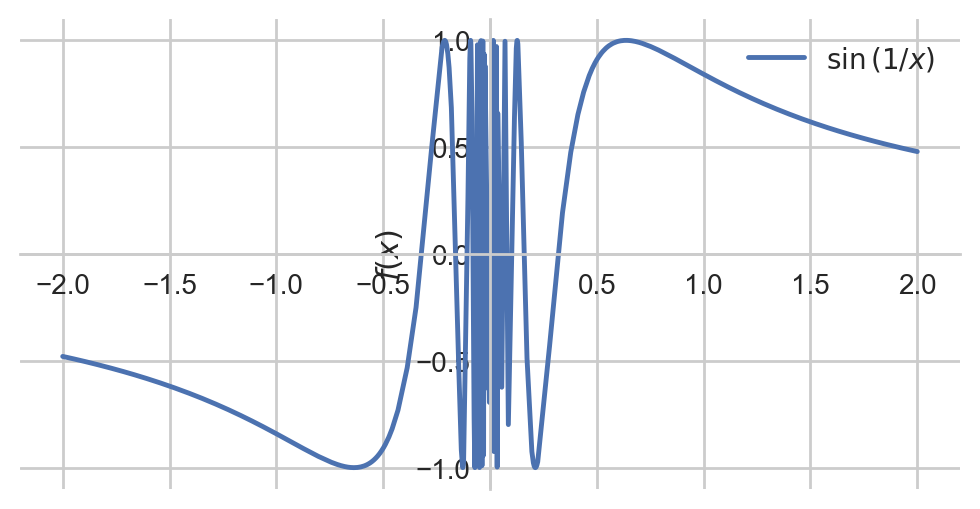

In [9]:
_ = sym.plot(
    (sym.sin(1/x), (x, -2, 2)),
    show=True, aspect_ratio=(1,1), legend=True, size=(5,5)
)

### 3.3. Derivatives evaluation

#### Basic derivatives
These basic derivatives are found easily using the definition.
- Constants: $\dfrac{d}{dx}c=0 $

- Power functions: $\dfrac{d}{dx}x^n=nx^{n-1}$

- Exponential functions: $\dfrac{d}{dx}a^x=a^x\log{a}$

- Logarithm functions: $\dfrac{d}{dx}\log_ax=\dfrac{1}{x\log{a}}$

- Trigonometric functions: $\dfrac{d}{dx}\sin{x}=\cos{x},\;\dfrac{d}{dx}\cos{x}=\sin{x},\;\dfrac{d}{dx}\tan{x}=1+\tan^2x$

#### Derivative rules
- Sum rule: $\dfrac{d}{dx}(f(x)+g(x))=\dfrac{d}{dx}f(x)+\dfrac{d}{dx}g(x)$

- Product rule: $\dfrac{d}{dx}(f(x)\cdot g(x))=\dfrac{df(x)}{dx}g(x)+\dfrac{dg(x)}{dx}f(x)$

- Chain rule: $\dfrac{d}{dx}f(g(x))=\dfrac{df(g(x))}{dg(x)}\dfrac{dg(x)}{dx}$

#### Taylor series
Sometimes, we need to solve a [differential equation], in which both a function and its derivatives exist. One way to solve this kind of function is using [Taylor series], an approximation of the function $f(x)$ using derivatives at a specific point $a$:

$$f(x)
\approx \lim_{N\rightarrow\infty}\sum_{n=1}^{N}\frac{f^{(n)}(a)}{n!}(x-a)^n
= f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^2+\dots
$$

$N$ is called the order of the Taylor series. The higher $N$ is, the more accurate the approximation is.

[differential equation]: https://en.wikipedia.org/wiki/Differential_equation
[Taylor series]: https://en.wikipedia.org/wiki/Taylor_series

#### Implementation

&#9800;&nbsp;<b>Practice</b><br>
Given the function $y=\log(x^2)$ . Find the derivative of $y$ at $x=1$ using derivative rules and check it again with SymPy.

Let $y=f(u)=\log(u)$ and $u=g(x)=x^2$. Using the chain rule:

$$\frac{dy}{dx} = \frac{dy}{du}\cdot\frac{du}{dx} = \frac{1}{u}\cdot2x = \frac{2x}{x^2} = \frac{2}{x}$$

So, at $x=1$, the rate of change of $y$ with respect to $x$ is $2$.

In [4]:
from dsutil import sym

In [4]:
x, y, z = sym.symbols('x:z')

In [18]:
expr = sym.log(x**2)
lhs = sym.Derivative(expr)
rhs = expr.diff()
sym.Eq(lhs, rhs)

Eq(Derivative(log(x**2), x), 2/x)

In [40]:
rhs.subs({x: 1})

2

### 3.4. Multivariate derivatives

#### Partial derivative
[Partial derivative] is a concept defined for [multivariate functions], it is the derivative of the function with respect to each variable with the others held constant. For instance, the partial derivatives of $y=f(x_1,x_2)=x_1^2+\log{x_2}+x_1x_2$ are:

$$\begin{aligned}
\frac{\partial{y}}{\partial{x_1}} &= 2x_1+x_2 \\
\frac{\partial{y}}{\partial{x_2}} &= \frac{1}{x_2}+x_1
\end{aligned}$$

[Partial derivative]: https://en.wikipedia.org/wiki/Partial_derivative
[multivariate functions]: https://en.wikipedia.org/wiki/Function_of_several_real_variables

#### Gradient
The partial derivative reppresents the rate of change in a specific direction. If we use a column vector $\mathbf{x}$ to denote the input, then the set of all partial derivatives of $y=f(\mathbf{x})$ is called the [gradient], denoted $\nabla{y}$. The gradient is also written as a column vector, thus it has the same size with the input vector.

$$\mathbf{g}_f=\nabla{y}=\begin{bmatrix}
    \dfrac{\partial{y}}{\partial{x_1}} &
    \dfrac{\partial{y}}{\partial{x_2}}
\end{bmatrix}^\text{T} $$

[gradient]: https://en.wikipedia.org/wiki/Gradient

#### Hessian
Becasue this is the most popular case in [matrix calculus] (scalar-by-vector derivatives), we are moving to a more complicated concept: second-order derivatives. It is written as a matrix, called the [Hessian matrix] as follows:

$$\mathbf{H}_f=\begin{bmatrix}
    \dfrac{\partial^2{f}}{\partial{x_1}^2} & \dfrac{\partial^2{f}}{\partial{x_1x_2}} \\
    \dfrac{\partial^2{f}}{\partial{x_2x_1}} & \dfrac{\partial^2{f}}{\partial{x_2}^2} \\
\end{bmatrix} $$

[matrix calculus]: https://en.wikipedia.org/wiki/Matrix_calculus
[Hessian matrix]: https://en.wikipedia.org/wiki/Hessian_matrix

## 4. Integrals
The [integral] of a function $f$ is a function $F$ describes areas under the curve up to different points. The process of finding an integral is call [integration]. In Data Science, the most recognizable application of Integral Calculus is defining probabilities.

[integral]: https://en.wikipedia.org/wiki/Antiderivative
[integration]: https://en.wikipedia.org/wiki/Integral

### 4.1. Definition
The problem of area under the curve exmained when we start learning about limits gives us the definition of *definite integral*. The term *area* here is loosely understood, as it can be negative when the curve is under the $x$-axis. It is defined within an interval $[a,b]$ given by:

$$\int_a^bf(x)dx=\lim_{\Delta{x}\rightarrow0}\sum_{n=1}^{N}{f(x_n)\Delta{x}}$$

The term $dx$ refers to a very small $\Delta{x}$ is called an [infinitesimal]. When using integral as a function, we use the concept *finite integral* or [anti-derivative] written as a function $F$ where $F'(x)=f(x)$. This is a more general concept as we can use it to compute definite integral:

$$\int_a^bf(x)dx=F(b)-F(a)=\int f(b)dx-\int f(a)dx$$

Notice that if $F'(x)=f(x)$ then $(F(x)+c)'=f(x)$ for any constant $c$. So basically there are a countless number of anti-derivatives, but they are all related. For simplification purpose, we only write $F(x)$.

[infinitesimal]: https://en.wikipedia.org/wiki/Infinitesimal
[anti-derivative]: https://en.wikipedia.org/wiki/Antiderivative

### 4.2. Integration rules
This section summaries most popular anti-derivatives.
- Constant: $\displaystyle{\int cdx=cx}$

- Power functions: $\displaystyle{\int x^ndx=\dfrac{x^{n+1}}{n+1}}$

- Exponential functions: $\displaystyle{\int a^xdx=\frac{a^x}{\log a}}$

- Trigonometric functions:
$\displaystyle{
    \int\sin(x)dx=-\cos{x},\;
    \int\cos(x)dx=\sin{x},\;
    \int\tan(x)dx=-\log|\cos(x)|
}$

### 4.3. Implementation

In [1]:
from dsutil import sym

In [1]:
x, y, z = sym.symbols('x:z')

In [7]:
x, y, z = sym.symbols('x:z')
y = sym.log(x)
y.integrate()

x*log(x) - x

In [12]:
x, y, z = sym.symbols('x:z')
z = 3**x + y**2
z.integrate((x, 1, 2), (y, 4, 5)).evalf()

25.7947686930944

## 5. Optimization
[Optimization] is the problem of finding *global* [extrema] of a function. It is solved using [Fermat's theorem], saying that the derivative of a function at a local maximum or local minimum must be zero.

[Optimization]: https://en.wikipedia.org/wiki/Mathematical_optimization
[extrema]: https://en.wikipedia.org/wiki/Maxima_and_minima
[Fermat's theorem]: <https://en.wikipedia.org/wiki/Fermat%27s_theorem_(stationary_points)>

### 5.1. Derivative test
[Derivative test] is an application of derivative for examining important properties of a function. Two commonly used derivatives are:
- first-order derivative, to describe the [monotonicity] and to locate [stationary points]
- second-order derivative, to describe the [concavity] and to locate [inflection points]

Combined together, the two tests enable the capacity of finding *local minima* and *local maxima*. In this section, we are going to analyze the results of derivative tests of the function:

$$y=(2x^5-x^4-10x^3)/16$$

[Derivative test]: https://en.wikipedia.org/wiki/Derivative_test
[monotonicity]: https://en.wikipedia.org/wiki/Monotonic_function
[stationary points]: https://en.wikipedia.org/wiki/Stationary_point
[concavity]: https://en.wikipedia.org/wiki/Concave_function
[inflection points]: https://en.wikipedia.org/wiki/Inflection_point

In [9]:
from dsutil import np, sym, plt

In [10]:
f = lambda x: 0.125*x**5 - 0.0625*x**4 - 0.625*x**3
f1 = lambda x: 0.625*x**4 - 0.25*x**3 - 1.875*x**2
bound_left, bound_right = -2.2, 2.6

x = sym.Symbol('x')
y = f(x)

map_sign_color = {
    'negative': 'indianred',
    'positive': 'royalblue',
    '-': 'indianred',
    '+': 'royalblue',
}

#### First-derivative test
So far, we have known the derivative at a point implies the *instantaneous velocity* of the function. So, if we could solve for the sign of the derivative in all possible intervals, we also know when the function is *increasing* or *decreasing*. Below are the table of sign for $f'(x)$ and its relationship with the graph of $f(x)$. The graph is partially colored so that the red intervals indicate $f'(x)<0$ and blue intervals indicate $f'(x)>0$.

|$x$    |   |$-\infty$|   |$-1.544$|   |$0$|   |$1.944$|   |$\infty$|
|:-----:|:-:|:-------:|:-:|:------:|:-:|:-:|:-:|:-----:|:-:|:------:|
|$f'(x)$|   |         |$+$|$0$     |$-$|$0$|$-$|$0$    |$+$|        |

<img src="../output/chap-02/function-monotonicity.png" style="height:300px; margin:20px auto 20px;">

The black points are where the derivative is zero, we generally call them *stationary points*. However, the behaviours of the function around them are quite different. The first stationary point, $x\approx-1.544$, we witness that $y$ is switching from increasing to decreasing when going through it. This indicates $x\approx-1.544$ is a *relative*, or *local* maximum. Likewise, $x\approx-1.944$ is a local minimum. But $x=0$ is different, the function does not change its monotonicity after going through this point, so it is not a maximum neither a minimum. Points like this are called *saddle points*.

In [20]:
derivative = y.diff()
list_stationary = [float(i) for i in sorted(sym.solveset(derivative, x))]
list_interval = [
    np.linspace(bound_left, list_stationary[0], 1000),
    np.linspace(list_stationary[0], list_stationary[1], 1000),
    np.linspace(list_stationary[1], list_stationary[2], 1000),
    np.linspace(list_stationary[2], bound_right, 1000),
]

In [ ]:
fig, ax = plt.subplots()
ax.axhline(0, c='grey')

ax.plot(list_interval[0], f(list_interval[0]), color=map_sign_color['+'], label='Increasing (velocity > 0)')
ax.plot(list_interval[1], f(list_interval[1]), color=map_sign_color['-'], label='Decreasing (velocity < 0)')
ax.plot(list_interval[2], f(list_interval[2]), color=map_sign_color['-'])
ax.plot(list_interval[3], f(list_interval[3]), color=map_sign_color['+'])

for stationary in list_stationary:
    ax.plot(stationary, f(stationary), 'ok')
    ax.axvline(stationary, ls='--', c='grey', alpha=0.5)

ax.legend()
ax.axis('scaled')
ax.grid(False)
ax.set_xticks(list_stationary)
ax.set_yticks([])

fig.savefig('../output/chap-02/function-monotonicity.png', dpi=500, bbox_inches='tight')
plt.close(fig)

#### Second-derivative test
We first talk about the meaning of [second derivative]. Because it is computed by taking the rate of change of velocity, it describes how the velocity is changing itself. In other words, second derivative is the representation of *instantaneous acceleration*. Below is the table of sign for $f''(x)$ and how it affects $f(x)$ and $f'(x)$:

|$x$     |   |$-\infty$|   |$-1.084$|   |$0$|   |$1.384$|   |$\infty$|
|:------:|:-:|:-------:|:-:|:------:|:-:|:-:|:-:|:-----:|:-:|:------:|
|$f''(x)$|   |         |$-$|$0$     |$+$|$0$|$-$|$0$    |$+$|        |

<img src="../output/chap-02/function-concavity.png" style="height:300px; margin:20px auto 20px;">

When the second derivative is negative (red sections), which means the velocity is decreasing, we witness that the function is *concave*. In contrast, the function is *convex* in blue sections. This is the main result of the second derivative test, it pairs with first-derivative test to conclude if a stationary point is whether a local minimum, a local maxium or a saddle point:
- If $f'(a)=0$ and $f''(a)>0$ then $x=a$ is a local minimum of $f(x)$
- If $f'(a)=0$ and $f''(a)<0$ then $x=a$ is a local maximum of $f(x)$
- If $f'(a)=f''(a)=0$ then $x=a$ is a saddle point

We also observe that at black points, the function *switches* between concave and convex. Such a point is called an *inflection point*. This is another benefit of second-derivative test. Also note that some resources refer to concave/convex as concave down/up.

[second derivative]: https://en.wikipedia.org/wiki/Second_derivative

In [149]:
derivative = y.diff().diff()
list_inflection = [float(i) for i in sorted(sym.solveset(derivative, x))]

list_interval = [
    np.linspace(bound_left, list_inflection[0], 1000),
    np.linspace(list_inflection[0], list_inflection[1], 1000),
    np.linspace(list_inflection[1], list_inflection[2], 1000),
    np.linspace(list_inflection[2], bound_right, 1000),
]

In [154]:
x_plot = np.linspace(bound_left+0.5, bound_right-0.5, 1000)

fig, ax = plt.subplots()
ax.axhline(0, c='grey')

ax.plot(x_plot, f1(x_plot), c='grey', label='Velocity')

ax.plot(list_interval[0], f(list_interval[0]), color=map_sign_color['-'], label='Concave (acceleration < 0)')
ax.plot(list_interval[1], f(list_interval[1]), color=map_sign_color['+'], label='Convex (acceleration > 0)')
ax.plot(list_interval[2], f(list_interval[2]), color=map_sign_color['-'])
ax.plot(list_interval[3], f(list_interval[3]), color=map_sign_color['+'])

for inflection in list_inflection:
    ax.plot(inflection, f(inflection), 'ok')
    ax.plot(inflection, f1(inflection), 'ok')
    ax.axvline(inflection, ls='--', c='grey', alpha=0.5)

ax.legend()
ax.axis('scaled')
ax.grid(False)
ax.set_xticks(list_inflection)
ax.set_yticks([])

fig.savefig('../output/chap-02/function-concavity.png', dpi=500, bbox_inches='tight')
plt.close(fig)

### 5.2. Constrained optimization
[Constrained optimization] is the extension of the normal optimization problem, in which the solution must satisfy specific contraints. This type of otimization is very popular in real world problems.

$$\begin{array}{rll}
\min              & f(\mathbf{x}) \\
\text{subject to} & g_i(\mathbf{x})=0    & \text{for }i=1,2,\dots \\
                  & h_j(\mathbf{x})\geq0 & \text{for }j=1,2,\dots
\end{array}$$

Here, $g=0$ refers to equality constraints and $h=0$ refers to non-equality constraints. The indices $i$ and $j$ are added to imply that there can be an unlimited number of constraints. Also note that this is the most general form of an optimization problem, as other scenarios such as maximizing, non-zero right hand side and "less than" constraints can be easily converted to this form.

[Constrained optimization]: https://en.wikipedia.org/wiki/Constrained_optimization

#### Lagrange multiplier
[Lagrange multiplier] is a theorem for optimizing a function with equality constraints only. Intuitively, it says that at an optimal point $\mathbf{x}^*=(x_1^*,x_2^*,\dots)$, the gradient of $f$ has the same direction with the gradient of $g$. Mathematically, the theorem states that there always exists a real number $\lambda$, called the Lagrange multiplier, such that:

$$\nabla f(\mathbf{x}^*)=-\lambda\nabla g(\mathbf{x}^*)$$

The solution $\mathbf{x}^*$ and $\lambda$ that satisfies the above equation, interestingly, is the saddle point of
$\mathcal{L}(\mathbf{x},\lambda)=f(\mathbf{x})+\lambda g(\mathbf{x})$, also known as the *Lagrange function*. Solving for $\mathbf{x}^*$ and $\lambda$ yields the system of equations:

$$\begin{array}{ll}
\text{Stationarity:} & \nabla\mathcal{L}(\mathbf{x},\lambda)=\mathbf{0} \\
\text{Feasibility:}  & g(\mathbf{x})=0
\end{array}$$

One thing to notice, is that solving this yields only a [necessary condition] and still requires some sufficient conditions to confirm if a solution is an extremum. And even that, the extrema we have found so far are local ones, we still need to compare them to get the global optima. 

[Lagrange multiplier]: https://en.wikipedia.org/wiki/Lagrange_multiplier
[necessary condition]: https://en.wikipedia.org/wiki/Necessity_and_sufficiency

&#9800;&nbsp;<b>Practice</b><br>
Find the minimum value of $f(x_1,x_2)=x_1^2+2x_2^2$ subject to the constraint $g(x_1,x_2)=2x_1+x_2-9=0$, using Lagrange multiplier.

First, calculate the gradients of $f$ and $g$. Here, $\mathbf{i}_1$ and $\mathbf{i}_2$ are the unit vectors of the respective input dimensions.

$$\begin{aligned}
\nabla f &= 2x_1\mathbf{i}_1+4x_2\mathbf{i}_2 \\
\nabla g &= \mathbf{i}_1+2\mathbf{i}_2 \\
\end{aligned}$$

According to the method of Lagrange multiplier, $\nabla f=\lambda\nabla g$, along with the constraint give us the system:

$$\begin{aligned}
2x_1 &= 2\lambda \\
4x_2 &= \lambda \\
2x_1+x_2 &= 9 \\
\end{aligned}$$

Solving it gives us $(x_1^*,x_2^*)=(4,1)$ and $\lambda=4$.

#### Multiple constraints
Starting simple let us understand Lagrange multiplier in an intuitive way. Now, it's time to extend the method a little, by considering more than one equality constraints: $g_1(\mathbf{x})=g_2(\mathbf{x})=\ldots=0$, or shortly: $\mathbf{g}(\mathbf{x})=\mathbf{0}$. In this case, our Lagrange function will be:

$$
\mathcal{L}(\mathbf{x},\boldsymbol{\lambda})
= f(\mathbf{x})+\boldsymbol{\lambda}^\text{T}\mathbf{g}(\mathbf{x})
= f(\mathbf{x})+\sum{\lambda_ig_i(\mathbf{x})}
$$

Solving this more general problem is the same as in the case of a single constraint. Notice the system of equations will be equal to the total number of elements in $\mathbf{x}$ and $\boldsymbol{\lambda}$.

#### KKT conditions
[Karush-Kuhn-Tucker conditions] (KKT conditions) is a technique extending Lagrange multiplier to adapt non-equality constraints. Let's say, we are optimizing a simple problem with one equality and one non-equality constraints:

$$\begin{array}{rll}
\min              & f(\mathbf{x}) \\
\text{subject to} & \mathbf{g}(\mathbf{x})=\mathbf{0}\text{ and }\mathbf{h}(\mathbf{x})\leq\mathbf{0} \\
\end{array}$$

With the introduction of KTT multipliers, $\boldsymbol{\lambda}$ and $\boldsymbol{\mu}$, we construct the KKT function which is very close to the Lagrange function:

$$\mathcal{L}(\mathbf{x},\boldsymbol{\lambda},\boldsymbol\mu)
=f(\mathbf{x})+\boldsymbol\lambda^\text{T}\mathbf{g}(\mathbf{x})+\boldsymbol{\mu}^\text{T}\mathbf{h}(\mathbf{x})
$$

KKT theorem states that the optimal solution of this problem must satisfies all these 4 conditions:

$$\begin{array}{ll}
\text{Stationarity:}             & \nabla\mathcal{L}(\mathbf{x},\boldsymbol{\lambda},\boldsymbol{\mu})=\mathbf{0} \\
\text{Primal feasibility:}       & \mathbf{g}(\mathbf{x})=\mathbf{0}\text{ and }\mathbf{h}(\mathbf{x})\leq\mathbf{0} \\
\text{Dual feasibility:}         & \boldsymbol\mu\geq\mathbf{0} \\
\text{Complementary slackness:}  & \boldsymbol\mu^\text{T}\mathbf{h}(\mathbf{x})=\mathbf{0} \\
\end{array}$$

As being a generalization of Lagrange multiplier, KKT conditions are also necessary conditions. The method is applied popularly in economics, especially in [profit maximization].

[Karush-Kuhn-Tucker conditions]: https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions
[profit maximization]: https://en.wikipedia.org/wiki/Profit_maximization

#### Interpretation
<img src="../image/chap-02/lagrange-multiplier.png" style="height:300px; margin:20px auto 20px;">

The image above shows the geometric meaning of Lagrange multiplier: at the optimal point, $\nabla f$ and $\nabla g$ are two parallel vectors. Imagine we know the function $f$ measuring the *distance* ($y$) to the *treasure* ($\mathbf{x}^*$) with respect to the *location* ($\mathbf{x}$). We also have a *compass* always points to the treasure, shown in black arrows, which is a casual way to talk about the gradient. The treasure is in the forest, so we must follow a *trail* (red line, representing the constraint $g=0$). The red arrows represent the gradient of $g$.

The optimization problem in this example is: which point on the trail is closest to the treasure? Lagrange multiplier gives us the solution for this problem: it is the point at which the black arrow is parallel to the red arrow, or in other words, the compass points perpendicularly to the trail. The ratio between two arrows, $\lambda$ can be interpreted as the *rate of change* of the objective function with respect to the constraint at the optimal solution:

$$\lambda=\frac{df}{dx}\div\frac{dg}{dx}=\frac{df}{dg}$$

In economics, the Lagrange multiplier (in the case of non-equality contraints) represents the [shadow price]. For example, a working day is limited to be 8 hours, and the manager of a company wants to hire an employee for an additional hour. Then, the Lagrange multiplier is marginal cost, showing the maximum price the manager would be willing to pay, based on the benefits he would get from this change.

The increase of time for a working day from 8 to 9 hours is known as the concept of *constraint relaxtion*. In economics, constraint relaxation can occur in a lot of situations, such as bribery and overtime hiring. Thus, Lagrange multiplier can help improve decision making by analyzing the marginal utility of breaking the rule.

[shadow price]: https://en.wikipedia.org/wiki/Shadow_price

### 5.3. Duality
The [duality principle] states that any optimization problem can be viewed in either of two perspective, the *primal problem* and the *dual problem*. The set of solutions of the two problems are not always the same (we refer to it as [duality gap]), but the dual problem is sometimes easier to solve and can express interesting properties of the optimization problem. In this section, we are going to learn about two common special forms with most applications of duality, *dual linear optimization* and *Lagrangean duality*.

[duality principle]: https://en.wikipedia.org/wiki/Duality_(optimization)
[duality gap]: https://en.wikipedia.org/wiki/Duality_gap

#### Linear optimization
[Linear optimization] is a special case of optimization problems, in which the function to optimize and the constraints are all linear functions. The canonical form of a linear program is given by:

$$\begin{array}{rl}
\max              & y=\mathbf{c}^\text{T}\mathbf{x} \\
\text{subject to} & \mathbf{A}\mathbf{x}\leq\mathbf{b}\text{ and }\mathbf{x}\geq\mathbf{0} \\
\end{array}$$

In the first constraint, the term $\mathbf{A}\mathbf{x}$ represents multipler linear constraints. The second constraint can always be transformed to, simply by changing the sign of the coefficients. The above problem is known as the *primal* form of the optimization problem, which has a *dual* problem given by:

$$\begin{array}{rl}
\min              & z=\mathbf{b}^\text{T}\mathbf{t} \\
\text{subject to} & \mathbf{A}^\text{T}\mathbf{t}\geq\mathbf{c}\text{ and }\mathbf{t}\geq\mathbf{0} \\
\end{array}$$

There are two important theorems about [linear duality] we need to take a look at:
- Weak duality theorem, states that the property $y\leq z$ is always true at any *feasible solution* to the the two problems
- Strong duality theorem, states that the optimal values of the two problems are the same, written formally as $\max{y}=\min{z}$

[Linear optimization]: https://en.wikipedia.org/wiki/Linear_programming
[linear duality]: https://en.wikipedia.org/wiki/Dual_linear_program

&#9800;&nbsp;<b>Practice</b><br>
A rancher is preparing for a flea market sale in which he intends to sell three types of clothing that are all comprised of wool from his sheep: peacoats, hats, and scarves. As the market is in high demand, the rancher is likely to sell out all of his products. With the limited materials and time, the rancher needs to determine how he should use his resources to maximize the profit. The following table show the rancher's total resources and how much resources each product requires.

|Material|Peacoat|Hat|Scarve|Resource|Unit|
|:-|:-:|:-:|:-:|:-:|:-:|
|Wool|9|2|4|50|foot|
|Fabric|80|40|20|460|inch|
|**Profit**|**175**|**25**|**21**||dollar|

Denote $x_1,x_2,x_3$ the *quantity* of each product to produce, we write the *profit* formula ($y$) as the objective function and write each *resource limitation* as a constraint ($\mathbf{b}$). This maximization problem gives us the primal form.

$$\begin{array}{rll}
\max   & y=175x_1+25x_2+21x_3 \\
\text{subject to} & 9x_1+2x_2+4x_3\leq50\,(\text{ft}^2) \\
                  & 80x_1+40x_2+20x_3\leq460\,(\text{in}) \\
                  & x_1,x_2,x_3\geq0 \\
\end{array}$$

Now, imagine we are a clothing store who want to buy wool and fabric of the rancher at the *unit price* $t_1,t_2$, respectively. To persuade the rancher, the total *material price* we offer for each product must be at least equal to its *selling price* ($\mathbf{c}$). Being a purchasing department, we would want to minimize the total *expenditure* ($z$). This problem yields the dual form.

$$\begin{array}{rll}
\min              & z=50t_1+460t_2 \\
\text{subject to} & 9t_1+80t_2\geq175\,(\$) \\
                  & 2t_1+40t_2\geq25\,(\$) \\
                  & 4t_1+20t_2\geq21\,(\$) \\
                  & t_1,t_2\geq0 \\
\end{array}$$

Here is a summarization of economical interpretation of duality. In the primal problem, we are a manufacturing company dealing with quantities to maximize revenue, constrained by limited resources. In the dual problem, we are a retail company dealing with prices to minimize costs, constrained by price floors.

#### Lagrangean duality
Lagrangean duality is a more general form of linear duality, being capable of solving non-linear optimization problems. When talking about duality, it usually refers to Lagrangean duality. It is strongly related to Lagrange multiplier and KKT conditions, the extension of Lagrange multiplier. Consider the general form of an unconstrained optimization problem:

$$\begin{array}{rll}
\min              & f(\mathbf{x}) \\
\text{subject to} & \mathbf{g}(\mathbf{x})=\mathbf{0}\text{ and }\mathbf{h}(\mathbf{x})\leq\mathbf{0} \\
\end{array}$$

The dual problem is:

$$\begin{array}{rll}
\max_{\lambda,\mu}\;\min_x & \mathcal{L}(\mathbf{x},\boldsymbol{\lambda},\boldsymbol\mu) \\
\text{subject to}          & \boldsymbol\mu\geq\mathbf{0} \\
\end{array}$$

In this problem, weak duality always holds. If [Slater's condition] is satisfied, then strong duality holds. Also when strong duality holds, we have the optimal solution satisfies complementary slackness: $\mu_h=0$ for every non-equality constrain. This leads to two cases, $\mu=0$ or $h=0$. To interpret this economically, think about the constraint $h\leq0$ as the limitation of a resource.
- If the Lagrange multiplier is zero ($\mu=0$), then we get an optimal objective even when this resource did not reach its limit ($h<0$). The resource in this case is redundant and does not help improving our objective.
- If the constraint is [binding] ($h=0$), it means we are running out of this resource. Its shadow price (Lagrange multiplier) is positive ($\mu>0$) indicating this is a valuable resource. Hence, if we can find a way to relax the limitation of this resource ($h\leq\epsilon>0$) at a reasonable cost (less than shadow price), do it.

[Slater's condition]: https://en.wikipedia.org/wiki/Slater%27s_condition
[binding]: <https://en.wikipedia.org/wiki/Constraint_(mathematics)#Terminology>

## Resources
- *openstax - [Calculus Volume 1](https://openstax.org/books/calculus-volume-1/pages/1-introduction)*
- *openstax - [Calculus Volume 2](https://openstax.org/books/calculus-volume-2/pages/1-introduction)*
- *openstax - [Calculus Volume 3](https://openstax.org/books/calculus-volume-3/pages/1-introduction)*
- *rodrigopacios.github - [Thomas' Calculus](https://rodrigopacios.github.io/mrpacios/download/Thomas_Calculus.pdf)*
- *quora - [Can you explain Lagrange Multipliers without using any mathematical notation?](https://qr.ae/pvxTdc)*
- *optimization.cbe.cornell - [Duality](https://optimization.cbe.cornell.edu/index.php?title=Duality)*
- *optimization.cbe.cornell - [Lagrangean duality](https://optimization.cbe.cornell.edu/index.php?title=Lagrangean_duality)*
- *math.ucdenver - [Lagranrian duality](http://math.ucdenver.edu/~sborgwardt/wiki/index.php/Lagrangian_Duality)*
- *medium - [Optimization stories: KKT conditions](https://towardsdatascience.com/optimization-stories-kkt-conditions-f86aea4fb6c2)*
- *osborne.economics.utoronto - [Interpretation of Lagrange multipliers](https://mjo.osborne.economics.utoronto.ca/index.php/tutorial/index/1/ilm/t)*
- *optimization.mccormick.northwestern - [Lagrangean duality](https://optimization.mccormick.northwestern.edu/index.php/Lagrangean_duality)*

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*